# Daisy World

## Use of these notebooks

**When using this notebook (and other notebooks), you should first change the name of the notebook, e.g. by adding you name to the end of the filename**. All notebooks must have the extension `.ipynb`.

The code in these notebooks is written in Python, but we have tried to keep it at a high enough level that you should be able to understand, use and modify it even without knowing the details of Python coding. You can get extra help on this in the live sessions or in office hours if you need further support.

You should complete the two practicals this week (this and [Simple Earth System Model](01-Simple_Earth_System_Model.ipynb)), with support provided in the live sessions. You should make notes on your observations from the model development and use as you go along, either in some lab journal, or directly in this Jupyter notebook. 


## Introduction

In this notebook, we follow on from [01 Simple Earth System Model](01-Simple_Earth_System_Model.ipynb) and create another simple Earth System model that illustrates the role of feedback. This is based on the [Watson and Lovelock's (1983)](https://onlinelibrary.wiley.com/doi/abs/10.1111/j.1600-0889.1983.tb00031.x) paper "Biological homeostasis of the global environment: the parable of Daisyworld". As with the previous example, you should not take this model literally as an expression of a climate model, but you should be able to use it to better appreciate and explain the ideas behind negative feedback in such a system. 

You should complete these two practicals this week, with support provided in the live sessions. You should make notes on your observations from the model development and use as you go along, either in some lab journal, or directly in this Jupyter notebook. 

Before starting the practical, you should read the [Watson and Lovelock paper](https://onlinelibrary.wiley.com/doi/abs/10.1111/j.1600-0889.1983.tb00031.x) and watch this video:


[![NASA Daisy World](http://img.youtube.com/vi/sCxIqgZA7ag/0.jpg)](http://www.youtube.com/watch?v=sCxIqgZA7ag "Daisy World")


## Daisy World code


### Global temperature 

We start by developing our model function `my_first_earth_system(albedo,Jin)` from the [previous exercise](01-Simple_Earth_System_Model.ipynb).

In  equation 4 of [Watson and Lovelock](https://onlinelibrary.wiley.com/doi/abs/10.1111/j.1600-0889.1983.tb00031.x) they use the term `S` as the solar radiation flux, and `L` as a 'luminosity' variable. As with our previous model, we ignore any geometric effects.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

def global_T(albedo,area,L=1.0,S=917.0):
    '''
    A simple earth system model to give the effective
    planetary temperature (C).
    
    Function takes as input the daisy albedo (unitless) 
    array, the proportionate area of each, 
    and the incoming solar radiation S (in Wm^{-2})
    and luminosity L. Returns the effective
    temperature of the planet (in degrees C).
    
    Inputs:
    
    albedo : float array of length n_species + 1
             (unitless, 0<=albedo<=1). The final entry is
             for bare ground.
    area   : float array of length n_species + 1
             proportionate area of ground 
             covered by each species. The last entry 
             is for bare ground. This should
             sum to p
             
    Keywords:
    
    L           : Luminosity (unitless, 0<=L<=1)  
    S           : Solar radiation flux density (Wm^{-2})
    
    Returns:
    
    Te          : effective planetary temperature
    '''
    # A is planetary albedo (eqn 5)
    A = (albedo * area).sum()
    
    # Get effective temperature Te (eqn 4)
    # Stefan-Boltzmann constant 𝐽𝑠−1𝑚−2𝑇−4
    sigma = 5.670400e-8
    Jout = S*L*(1-A)
    Te = (Jout/sigma)**(1/4.)
    # return temperature in C 
    return Te-273

As before, we can plot this, to conform expected behaviour, for instance, as a function of albedo:

(0.0, 1.0)

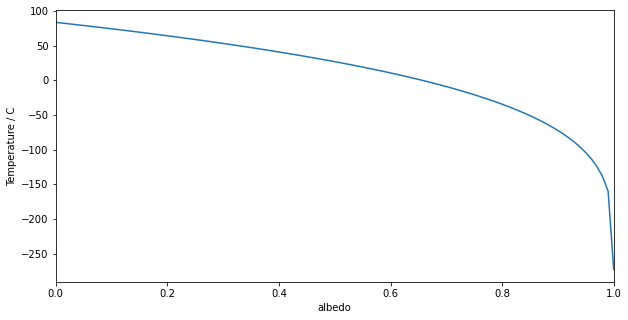

In [2]:
albedo = np.arange(0.0,1.01,0.01)
temerature = []
# proportionate area array
area = np.array([1.0])

# loop over the albedo values
for i,a in enumerate(albedo):
    # calculate global T for each value of albedo
    # and append to list
    temerature.append(global_T(np.array([albedo[i]]),area))

plt.figure(figsize=(10,5))
plt.plot(albedo,temerature)
plt.xlabel('albedo')
plt.ylabel('Temperature / C')
plt.xlim(albedo[0],albedo[-1])

#### Exercise

This plot is rather different to the one from the previous exercise. 

* Explain why this is so
* If Daisyworld consisted of all bare ground, what would the temperature be?
* If Daisyworld consisted of all black daisies, what would the temperature be?
* If Daisyworld consisted of all white daisies, what would the temperature be?
* Given that Daisies only grow in the temperature range 5 C to 40 C (p. 285), what are the implications of this?

In [3]:
### ANSWER

msg = '''
This plot is rather different to the one from the previous exercise.
Explain why this is so

The reason is that the Jin term used in Daisyworld and coded above as S 
(9.17e5 ergs cm^-2 s^-1, equivalent to 915 W m^-2) is very different to that used 
for Earth in the previous model (342 W m^-2), or nearly 3 times as much. 

Since temperature is proportionate to Jin^(1/4), multiplying Jin by a factor 
of 3 would increase temperature by a factor of (915/342)^(1/4) or about 1.28
'''

print(msg)


This plot is rather different to the one from the previous exercise.
Explain why this is so

The reason is that the Jin term used in Daisyworld and coded above as S 
(9.17e5 ergs cm^-2 s^-1, equivalent to 915 W m^-2) is very different to that used 
for Earth in the previous model (342 W m^-2), or nearly 3 times as much. 

Since temperature is proportionate to Jin^(1/4), multiplying Jin by a factor 
of 3 would increase temperature by a factor of (915/342)^(1/4) or about 1.28



Text(0.5, 1.0, 'decrease in temperature by factor of 1.28')

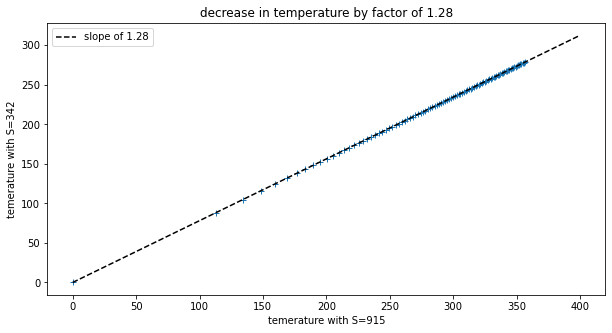

In [4]:
# illustrate this
albedo = np.arange(0.0,1.01,0.01)
temeratureOld = []

# proportionate area array
area = np.array([1.0])

# loop over the albedo values
for i,a in enumerate(albedo):
    # calculate global T for each value of albedo
    # and append to list
    temeratureOld.append(global_T(np.array([albedo[i]]),area,S=342))

plt.figure(figsize=(10,5))
# new and old temperature
plt.plot(np.array(temerature)+273,np.array(temeratureOld)+273,'+')
# slope of 1/1.28
plt.plot([0,400],[0,400/1.28],'k--',label='slope of 1.28')
plt.legend(loc='best')
plt.xlabel('temerature with S=915')
plt.ylabel('temerature with S=342')
plt.title('decrease in temperature by factor of 1.28')

In [5]:
msg = '''
If Daisyworld consisted of all bare ground, what would the temperature be?

From the paper, we see bare gound has an albedo of 0.5
(0.25, 0.75 for black and white daisies)
'''
print(msg)
T = global_T(np.array([0.5]),area)
print(f'temperature of bare gound = {T:.2f} C')

msg = '''
If Daisyworld consisted of all black daisies, what would the temperature be?
'''
print(msg)
T = global_T(np.array([0.25]),area)
print(f'temperature of black daisies = {T:.2f} C')

msg = '''
If Daisyworld consisted of all white daisies, what would the temperature be?
'''
print(msg)
T = global_T(np.array([0.75]),area)
print(f'temperature of white daisies = {T:.2f} C')


If Daisyworld consisted of all bare ground, what would the temperature be?

From the paper, we see bare gound has an albedo of 0.5
(0.25, 0.75 for black and white daisies)

temperature of bare gound = 26.87 C

If Daisyworld consisted of all black daisies, what would the temperature be?

temperature of black daisies = 58.86 C

If Daisyworld consisted of all white daisies, what would the temperature be?

temperature of white daisies = -20.84 C


In [6]:
msg = '''
Given that Daisies only grow in the temperature 
range 5 C to 40 C (p. 285), what are the implications of this?

A planet with all black, or all white daisies cannot survive,
the former being too hot and the latter too cold. 

If the planet is all bare ground, then daisies could survive, 
but there would be no daisies...
'''
print(msg)


Given that Daisies only grow in the temperature 
range 5 C to 40 C (p. 285), what are the implications of this?

A planet with all black, or all white daisies cannot survive,
the former being too hot and the latter too cold. 

If the planet is all bare ground, then daisies could survive, 
but there would be no daisies...



### area array

In the codes, we will store the **proportionate** areas of the different types of daisy in an array `area` with the black daisies in `area[0]` and the white daisies in `area[1]`. This has an extra term `areas[2]` (also given as `areas[-1]` the last entry in the array) to represent the proportionate area of fertile ground (the area available to grow into). The maximum area the daisies can achieve is set to the variable `p` (through we will use a value of 1.0 for this). We set a minimum area `min_area=0.01` to ensure the daisies don't disappear.

We build a utility function `areas(area,p=1.0)` to make sure that the areas balance correctly.

In [7]:
def areas(area,p=1.0,min_area=0.01):
    '''
    Function to balance the areas array
    
    Inputs:
    
    area  : float numpy array of length n_species + 1
               proportionate area of ground 
               covered by each species. The last entry 
               is for bare ground. This should
               sum to p
             
    Keywords:
    
    p        : proportion of fertile area (1.0)
    min_area : minimu area for daisies
    
    '''    
    # fix any values <= min_area
    area[area<min_area] = min_area
    
    # sum the daisies area
    # covered is area of fertile ground covered 
    # by daisies. area[:-1] is the daisy areas.
    covered = area[:-1].sum()
    if covered > p:
        # normalise 
        area = area * p / covered
        covered = area[:-1].sum()
    # fertile ground
    area[-1] = p - covered
    return area
    
# test the code works!
# -ve test
assert np.isclose(areas(np.array([-0.1,-0.1,3.0]))    ,np.array([0.01, 0.01, 0.98])).all()
# limit to p test
assert np.isclose(areas(np.array([0.1,0.4,3.0]),p=0.5),np.array([0.1, 0.4, 0. ])).all()
# balance to p test
assert np.isclose(areas(np.array([0.1,0.3,3.0]),p=0.2),np.array([0.05, 0.15, 0.])).all()

### Local temperature

Next, we define the local daisy temperature, as a function of the global temperature `Te` and a 'resistance' term `q`. If `q` is set to 0, the temperature of all daisies will be the same as the planetary mean. `q` should be set to less than $0.2 S L / \sigma$ to be physically realisable.

Before we develop the function, we need to consider an upper limit for the resistance term `q`. This is an empirical term to provide for lateral transfer of heat energy that is otherwise lacking in the system.

    the parameter q expresses the degree to which solar energy, after having been absorbed by the planet, is redistributed amongst the three types of surface. (p. 285)
    
In the paper, they use a scaled parameter `q'`, where `q' =q/(4 * (273 + 22.5)**3)` and use a value of 20 for `q'`:

In [8]:
# q prime (after eqn 7)
qfactor = (4 * (273 + 22.5)**3)
q_max = 20

qmax = q_max * qfactor

print(f'max value of q is {qmax}')
print(f'max value of q\' is {q_max}')

max value of q is 2064250710.0
max value of q' is 20


so, around `2.1e9` as a maximum value for `q`, or `q'` of 20. For convenience, we define `local_T()` to operate with `q'`:

In [9]:
def local_T(albedo,area,Te,q_,p=1.0,\
            min_area=0.01,approx=False):
    '''
    Function to calculate local temperature as a function
    of global effective temperature (C) Te, 'resistance' q and
    albedo contrast. We need (albedo * area).sum() to get 
    planet albedo for the contrast term.
    
    0 <= q_ <= 20
    
    Returns array of local tempertures T1 (C)
    
    Inputs:
    
    albedo : float array of length n_species + 1
             (unitless, 0<=albedo<=1). The final entry is
             for bare ground.    
    area   : float array of length n_species + 1
             proportionate area of ground 
             covered by each species. The last entry 
             is for bare ground. This should
             sum to p
    Te     : float: global effective temperature (C)
    q_     : float: scaled resistance
    
    Keywords:
    
    p        : proportion of fertile area (1.0)
    min_area : minimu area for daisies
    approx   : False to run full q model or 
               True for equantion 7 approximation
    
    Return:
    T1     : array of local tempertures T1 (C)
     
    '''
    area = areas(area,p=p,min_area=min_area)
    # A is planetary albedo (eqn 5)
    A = (albedo * area).sum()
    
    if approx:
        # eqn 7
        T1 = Te + q_ * (A - albedo)
        return T1
    
    # T in C to K, raised to power of 4 (rhs eqn 6)
    # eqn 6
    TK4 = (Te + 273)**4
    

    # q times albedo contrast (rhs eqn 6)
    q = q_ * (4 * (273 + 22.5)**3)
    q_contrast = q * (A - albedo)
    
    # eqn 6
    T1 = np.power(q_contrast + TK4,1/4.) - 273
    return T1


Resistance is the reciprocal of conductance. At the lower limit, a resistance value of `q` of 0 gives infinite conductance between areas of black daisies and white daisies, so they have the same temperature (as the global temperature), at the upper limit, the temperatures of black and white daisies will be more different.

In [10]:
# set albedo for b, w and bare
albedo = np.array([0.25, 0.75, 0.5 ])

# set example areas
area   = np.array([1/3.,1/3.,1/3.])

# global T
Te = global_T(albedo,area)    
print(f'global; temperature {Te:.2f} C')

global; temperature 26.87 C


temperature differences from Te: [ 4.67419994 -4.90360178  0.        ]


(0.0, 20.0)

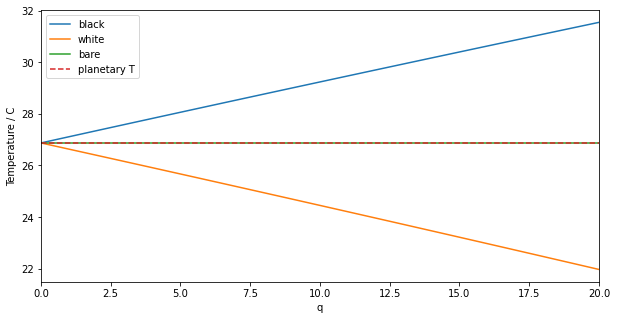

In [11]:
# vary q' from 0 to q_max in 100 steps
q_max = 20
q_ = np.linspace(0,q_max,100)
T1 = []

# loop over q
for i,qi in enumerate(q_):
    T1.append(local_T(albedo,area,Te,qi,approx=False))
# convert to numpy array
T1 = np.array(T1) 

# temperature differences from Te
print(f'temperature differences from Te: {T1[-1] - Te}')

# plot
plt.figure(figsize=(10,5))
plt.plot(q_,T1[:,0],label='black')
plt.plot(q_,T1[:,1],label='white')
plt.plot(q_,T1[:,2],label='bare')
plt.plot(q_,q_*0+Te,'--',label='planetary T')
plt.legend(loc='best')
plt.xlabel('q')
plt.ylabel('Temperature / C')
plt.xlim(0,20)

For a planet with 1/3 each of bare ground, black daisies and white daisies, we get a global temperature of nearly 27 C. For zero resistance, the temperature of all cover types is the same. But for high `q` there is a difference of nearly 10 degrees between the black and white daisies. As noted in the paper, the function is essentially linear for these parameters.

#### Exercise

* Test the model using the approximation in equation 7 (set `approx=True` when calling `local_T()`) 
* What is the difference in local temperature using the approximation?
* Given equation 6 in the paper, and noting that albedo is unitless, what are the units of `q`?
* The idea of a resistance here can be thought of as an analogue for blocking lateral heat transport or mixing. What are some mechanisms that give rise to lateral transport of energy in the Earth system?

global; temperature 26.87 C

What is the difference in local temperature using the approximation?

temperature differences from Te (full): [ 4.67419994 -4.90360178  0.        ]
temperature differences from Te (approx): [ 5. -5.  0.]


Text(0, 0.5, 'approximate q model')

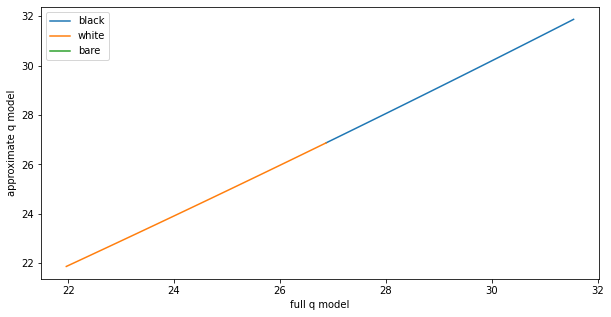

In [12]:
# Test the model using the approximation in 
# equation 7 (set `approx=True` when calling `local_T()`) 
# use T1_ for approximation
# use T1 for full model


# set albedo for b, w and bare
albedo = np.array([0.25, 0.75, 0.5 ])

# set example areas
area   = np.array([1/3.,1/3.,1/3.])

# global T
Te = global_T(albedo,area)    
print(f'global; temperature {Te:.2f} C')

# vary q' from 0 to q_max in 100 steps
q_max = 20
q_ = np.linspace(0,q_max,100)
T1 = []
T1_ = []

# loop over q
for i,qi in enumerate(q_):
    T1_.append(local_T(albedo,area,Te,qi,approx=True))
    T1.append(local_T(albedo,area,Te,qi,approx=False))
# convert to numpy array
T1 = np.array(T1) 
T1_ = np.array(T1_) 

# temperature differences from Te
msg = '''
What is the difference in local temperature using the approximation?
'''
print(msg)
print(f'temperature differences from Te (full): {T1[-1] - Te}')
print(f'temperature differences from Te (approx): {T1_[-1] - Te}')

# plot
plt.figure(figsize=(10,5))
plt.plot(T1[:,0],T1_[:,0],label='black')
plt.plot(T1[:,1],T1_[:,1],label='white')
plt.plot(T1[:,2],T1_[:,2],label='bare')
plt.legend(loc='best')
plt.xlabel('full q model')
plt.ylabel('approximate q model')

In [13]:
#### ANSWER

msg = '''
Given equation 6 in the paper, and noting that albedo is unitless, 
what are the units of `q`?

from equation 6, we can see that the q x albedo relates to T^4, 
with T in K, so q has units of K^4
'''
print(msg)


Given equation 6 in the paper, and noting that albedo is unitless, 
what are the units of `q`?

from equation 6, we can see that the q x albedo relates to T^4, 
with T in K, so q has units of K^4



In [14]:
### ANSWER

msg = '''
The idea of a resistance is rather artificial. 
What are some mechanisms that give rise to lateral transport of heat energy in the Earth system?

Lateral (sideways) transfers will generally involve sensible heat transfer
e.g. by conduction or convection. Examples would be convective energy transfer
in atmospheric or oceanic circulation systems.
'''
print(msg)


The idea of a resistance is rather artificial. 
What are some mechanisms that give rise to lateral transport of heat energy in the Earth system?

Lateral (sideways) transfers will generally involve sensible heat transfer
e.g. by conduction or convection. Examples would be convective energy transfer
in atmospheric or oceanic circulation systems.



## plant growth

In DaisyWorld, a constant death rate is assumed (`gamma`), giving the proportion of daisies that die at each time step (0.3 default value). This is again somewhat artificial, but serves the purpose of freeing up 'bare land' to allow other daisies to grow. The 'growth rate' (really, a form of birth rate) (equation 1) is made proportionate the amount of (fertile) bare land and a factor `beta` dependent on local temperature. The former limits the potential area that can be colonised and provides 'area balance' to the equations. The latter is quite a realistic mechanism, in that plants will tend to have optimal operating temperature ranges (5 to 40 C here) and will not establish or grow outside of such ranges. It is limited to the idea of establishment in this model: the daisies are established, and exist until they die. But we will see in later lectures that a similar approach can be used in dealing with vegetation dynamics in terrestrial carbon models and as components of climate models. 

We can plot the growth rate:

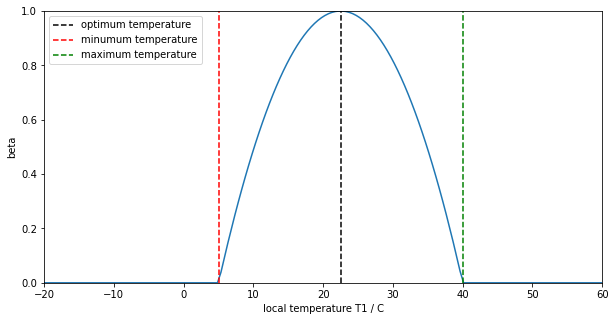

In [15]:
# local T
T1 = np.linspace(-20,60,162)

beta = 1 - 0.003265 * (22.5 - T1)**2
beta[beta<0] = 0

# plot
plt.figure(figsize=(10,5))
plt.plot(T1,beta)
plt.xlabel('local temperature T1 / C')
plt.ylabel('beta')
plt.xlim(T1[0],T1[-1])
plt.ylim(0,1)
plt.plot([22.5,22.5],[0,1],'k--',label='optimum temperature')
plt.plot([5,5],[0,1],'r--',label='minumum temperature')
plt.plot([40,40],[0,1],'g--',label='maximum temperature')
plt.legend(loc='best')

We now code the growth rate function:

In [16]:
def growth(area,T1,p=1.0,min_area=0.01,gamma=0.3):
    '''
    grow the daisies: change area occupied
    
    Use change in area wrt time (equation 1)
    to grow plant areas. Returns new values of area
    
    Inputs:
    
    area    : float array of length n_species + 1
              proportionate area of ground 
              covered by each species. The last entry 
              is for bare ground. This should
              sum to p
    T1      : float array of length n_species
              local temperature (C) of each species
           
    Keywords:
    
    p        : proportion of fertile area (1.0)
    min_area : minimum area for daisies
    gamma    : death rate per unit of time
    
    Return
    '''    
    # fix any issues with area
    areas(area,p=p,min_area=min_area)
    # x is area of free fertile ground
    x = area[-1]

    # growth rate beta (eqn 3)
    beta = 1 - 0.003265 * (22.5 - T1)**2
    beta[beta < 0] = 0
    
    # gains limited by x, losses area area * gamma
    dArea_dt = x * area * beta - area * gamma
    # remove the bare land one
    dArea_dt[-1] = 0
    
    # add growth 
    area += dArea_dt
    # fix any issues with area
    areas(area,p=p,min_area=min_area)
    
    return area

In [17]:
# a data dictionary!
data = {'ground': ['black daisy','white daisy','bare']}

# set albedo for b, w and bare
data['albedo'] = np.array([0.25, 0.75, 0.5 ])
# set example areas
data['original area']   = np.array([1/3.,1/3,1/3])

# global T
Te = global_T(data['albedo'],data['original area'])    
print(f'global temperature {Te:.2f} C')

q = 20
data['T1'] = local_T(data['albedo'],data['original area'],Te,q,approx=False)
data['area'] = growth(data['original area'],data['T1'],gamma=0.3)

# use pandas
df = pd.DataFrame(data)
df

global temperature 26.87 C


,ground,albedo,original area,T1,area
0,black daisy,0.25,0.314777,31.543089,0.314777
1,white daisy,0.75,0.344341,21.965288,0.344341
2,bare,0.50,0.340882,26.868889,0.340882


Both black and white daisies are within the growth temperature regime (5 to 40 C), but the change in area of the black daisies is negative. This is because, although the growth ('birth') rate is greater than zero, it does not compensate for the death rate. For the white daisies, the growth rate is higher than the death rate, so the change is positive.

Let's put these components together into a function for one time step:

In [18]:
def time_step(i,albedo,area,Te,T1,\
              p=1.0,gamma=0.3,L=1.0,min_area=0.01,
              S=917.0,q=20,approx=False):
    '''
    move the system on one time step
    from time step i to i+1. The function updates
    Te,T1 for time step i, increments area
    for i+1, and updates Te,T1 for i+1
    
    Inputs:
    
    i       : index for time (0 <= i < nsamp)
    albedo  : float array of length n_species + 1
              (unitless, 0<=albedo<=1). The final entry is
              for bare ground.           
            
    Generated:
    
    area    : float array of shape (n_species + 1,nsamp)
              proportionate area of ground 
              covered by each species. The last entry 
              in axis 0 is for bare ground. This should
              sum to p for each time step       
    Te      : float array of shape (nsamp,)
              global temperature (C)       
    T1      : float array of shape (n_species + 1,nsamp)
              local temperature (C)  
             
    Keywords:
    
    p        : proportion of fertile ground (1.0)
    gamma    : death rate per unit of time
    L        : Luminosity (unitless, 0<=L<=1)  
    S        : Solar radiation flux density (Wm^{-2})
    q        : q' value (resistance)
    approx   : q approximation (default False)
    min_area : minimum area for daisies
    '''
    # global Temperature
    Te[i] = global_T(albedo,area[:,i],L=L,S=S)
    # local temperture
    T1[:,i] = local_T(albedo,area[:,i],Te[i],q,\
                      approx=approx,min_area=min_area)
    
    # growth: 
    area[:,i+1] = growth(area[:,i],T1[:,i],p=p,\
                         gamma=gamma,min_area=min_area)
    # update temperatures
    Te[i+1] = global_T(albedo,area[:,i+1],L=L,S=S)
    T1[:,i+1] = local_T(albedo,area[:,i+1],Te[i+1],q,\
                        approx=approx,min_area=min_area)

    return

final areas [0.27317341 0.40017925 0.32664734]
final temperatures [27.49856972 17.50143028 22.62675543]


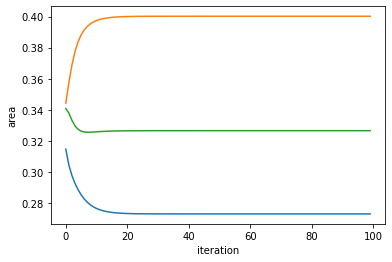

In [19]:
area0   = np.array([1/3.,1/3,1/3])
albedo = np.array([0.25,0.75,0.5])
q_ = 20
S  = 917.0
L  = 1.0

nsamp = 100
area     = np.zeros((albedo.shape[0],nsamp))
area[:,0] = area0

T1       = np.zeros((albedo.shape[0],nsamp))
Te       = np.zeros(nsamp)

for t in range(nsamp-1):
    time_step(t,albedo,area,Te,T1,\
              p=1.0,gamma=0.3,L=L,S=S,q=q_,approx=False)
plt.plot(area.T)
plt.xlabel('iteration')
plt.ylabel('area')

print(f'final areas {area[:,-1]}')
print(f'final temperatures {T1[:,-1]}')

We see that (for constant irradiance) the area settles down to a steady state value after around 15 iterations. The black daisies have the highest temperature and the white daisies the lowest. The area of white daisies is highest here.

We could improve the code by testing to see when area no longer changes and not bothering with further calculations, but that is not critical here.

We can plot the temperature to show that that settles down to the steady state at the same rate as area:

Text(0, 0.5, 'local temperature / C')

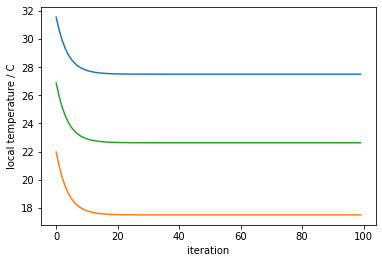

In [20]:
plt.plot(T1.T)
plt.xlabel('iteration')
plt.ylabel('local temperature / C')

#### Exercise

* Check to see if the steady state value for area reached depends on the initial conditions (i.e. on the area of each type of daisy we start from)


Check to see if the steady state value for area reached 
depends on the initial conditions (i.e. on the area of 
each type of daisy we start from)
final areas [0.27134083 0.40199522 0.32666394]
final temperatures [27.5 17.5 22.5]
final areas [0.27134083 0.40199522 0.32666394]
final temperatures [27.5 17.5 22.5]
final areas [0.27134083 0.40199522 0.32666394]
final temperatures [27.5 17.5 22.5]

They all converge to the same values, whatever the initial conditions



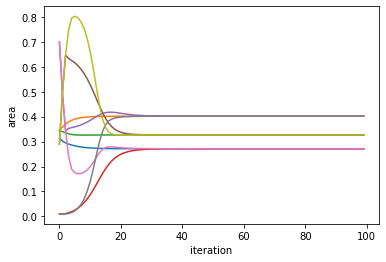

In [21]:
### ANSWER
msg = '''Check to see if the steady state value for area reached 
depends on the initial conditions (i.e. on the area of 
each type of daisy we start from)'''
print(msg)

albedo = np.array([0.25,0.75,0.5])
S = 917.0
L = 1.0
q = 20.
area     = np.zeros((albedo.shape[0],nsamp))
T1       = np.zeros((albedo.shape[0],nsamp))
Te       = np.zeros(nsamp)

# some different initial areas
for area0 in [np.array([1/3.,1/3,1/3]),np.array([0,1,0]),np.array([1,0,0])]:
    area[:,0] = area0
    for t in range(nsamp-1):
        time_step(t,albedo,area,Te,T1,\
                  p=1.0,gamma=0.3,L=L,S=S,q=q_,approx=True)
    plt.plot(area.T)
    print(f'final areas {area[:,-1]}')
    print(f'final temperatures {T1[:,-1]}')
    
plt.xlabel('iteration')
plt.ylabel('area')
msg = '''
They all converge to the same values, whatever the initial conditions
'''
print(msg)

We now wrap the code into a function `daisy_world` that loops over values of `L` in an input array, for given `albedo`:

In [22]:
def daisy_world(L,albedo,approx=False,min_area=0.01,
                niter=100,p=1.0,gamma=0.0,S=917.0,q=20):
    '''
    Run daisy world to equilibrium conditions
    
    Inputs:
    
    L       : float array of length nsamp
              Luminosity (unitless, 0<=L<=1)    
    albedo  : float array of length n_species + 1
              (unitless, 0<=albedo<=1). The final entry is
              for bare ground.     
             
    Keywords:
    
    niter    : n samples for steady state (default 100)
    p        : proportion of fertile ground (1.0)
    gamma    : death rate per unit of time
    S        : Solar radiation flux density (Wm^{-2})   
    approx   : q approximation (default False)
    min_area : minimum area for daisies
    
    Output:
    
    steady state values of
    
    area    : float array of shape (n_species + 1,nsamp)
              proportionate area of ground 
              covered by each species. The last entry 
              in axis 0 is for bare ground. This should
              sum to p for each time step       
    Te      : float array of shape (n_species + 1)
              global temperature (C)       
    T1      : float array of shape (n_species + 1,nsamp)
              local temperature (C)  
 
 
    '''
    #   iarea   : float array of shape (n_species + 1)
    #          initial proportionate area of ground 
    #          covered by each species.                
    iarea = np.array([1/3.,1/3,1/3])

    # results array
    area     = np.zeros((albedo.shape[0],L.shape[0]))
    Te       = np.zeros((L.shape[0],))
    T1       = np.zeros((albedo.shape[0],L.shape[0]))
    
    # arrays for generating steady state
    xarea     = np.zeros((albedo.shape[0],niter))
    xarea[:,0]= iarea
    xT1       = np.zeros((albedo.shape[0],niter))
    xTe       = np.zeros(niter)
    
    # loop over luminosity
    for i,xL in enumerate(L):
        for t in range(niter-1):
            time_step(t,albedo,xarea,xTe,xT1,min_area=min_area,\
                  p=p,gamma=gamma,L=xL,S=S,q=q,approx=approx)
        # load up values from last (steady state) entry
        area[:,i]     = xarea[:,-1]
        Te[i]         = xTe[-1]
        T1[:,i]       = xT1[:,-1]
    return area,Te,T1

Now we test this with the same example as in the paper (fig 1). In this first example, we set the albedo of all daisies to 0.5 so that there is no impact on albedo when changing the proportion of daisies (equivalent to top left of figure 1):

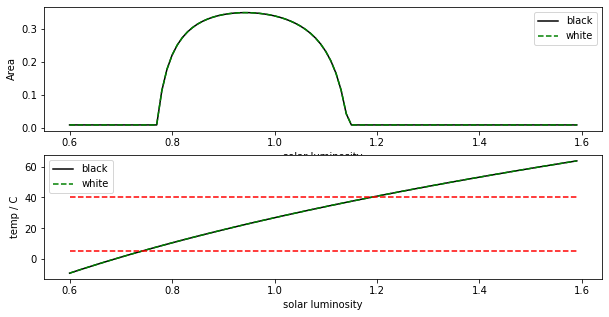

In [23]:
planet_albedo = 0.5
albedo = np.array([1,1,1.]) * planet_albedo 

L = np.arange(0.6,1.6,0.01)
q = 20
S = 917
gamma = 0.3

area,Te,T1 = daisy_world(L,albedo,gamma=gamma,S=S,q=q,approx=False,min_area=0.01)

figs,axs = plt.subplots(2,1,figsize=(10,5))
# area plot
axs[0].plot(L,area[0],'k',label='black')
axs[0].plot(L,area[1],'g--',label='white')
axs[0].set_xlabel('solar luminosity')
axs[0].set_ylabel('Area')
axs[0].legend(loc='best')

# temp
axs[1].plot(L,T1[0],'k',label='black')
axs[1].plot(L,T1[1],'g--',label='white')
axs[1].set_xlabel('solar luminosity')
axs[1].set_ylabel('temp / C')
axs[1].legend(loc='best')
axs[1].plot(L,L*0+5,'r--')
axs[1].plot(L,L*0+40,'r--')

The temperature tolerance limits of the daisies is shown by the red dashed lines in the lower plot. In this case, even though daisies can exist when the temperature is within these limits, the temperature of the planet has the same behaviour as if there was no life (i.e. no involvement in feedback). Life is entirely regulated by the temperature derived from the Stefan-Boltzmann law and is a function of solar radiation input and albedo.

We now plot the daisy behaviour as in the rest of figure 1, with a diversity of albedo values (`[0.25,0.75,0.5]`): 

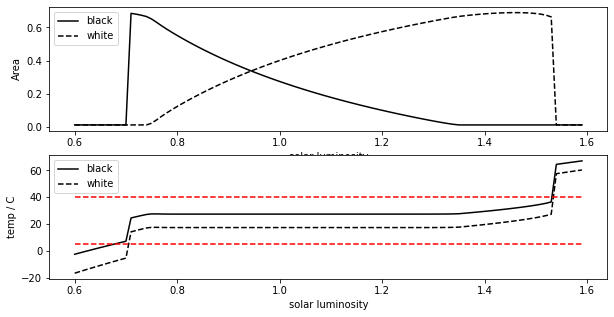

In [24]:
albedo = np.array([0.25,0.75,0.5])

L = np.arange(0.6,1.6,0.01)
q = 20
S = 917
gamma = 0.3

area,Te,T1 = daisy_world(L,albedo,gamma=gamma,S=S,q=q,approx=False)

figs,axs = plt.subplots(2,1,figsize=(10,5))
# area plot
axs[0].plot(L,area[0],'k',label='black')
axs[0].plot(L,area[1],'k--',label='white')
axs[0].set_xlabel('solar luminosity')
axs[0].set_ylabel('Area')
axs[0].legend(loc='best')

# temp
axs[1].plot(L,T1[0],'k',label='black')
axs[1].plot(L,T1[1],'k--',label='white')
axs[1].set_xlabel('solar luminosity')
axs[1].set_ylabel('temp / C')
axs[1].legend(loc='best')
axs[1].plot(L,L*0+5,'r--')
axs[1].plot(L,L*0+40,'r--')

There are likely some minor differences in the coding, but we can see by comparing the figures with those in the paper that we have essentially the same results for daisies with albedo `[0.25,0.75,0.5]`, `q'=20` and `gamma=0.3`.


#### Exercise

* You can directly simulate a planet with no life by setting `min_area=0.0` and `gamma=1.0`. Do this to show that the temperature is the same as when the daisies have the same albedo as the bare ground
* what controls the maximum attainable area of daisies?


The temperature is the same function of luminosity 
with or without life if there is no albedo contrast



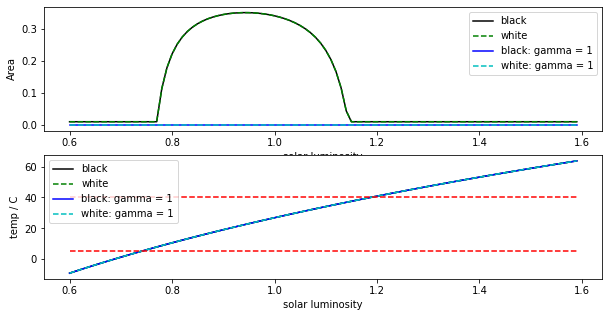

In [25]:
### ANSWER
msg = '''
You can directly simulate a planet with no life by setting min_area=0.0 and gamma=1.0. 
Do this to show that the temperature is the same as 
when the daisies have the same albedo as the bare ground
'''

planet_albedo = 0.5
albedo = np.array([1,1,1.]) * planet_albedo 

L = np.arange(0.6,1.6,0.01)
q = 20
S = 917
gamma = 0.3
area,Te,T1 = daisy_world(L,albedo,gamma=gamma,S=S,q=q,approx=False,min_area=0.01)

# no life case
gamma = 1.0
area1,Te1,T11 = daisy_world(L,albedo,gamma=gamma,S=S,q=q,approx=False,min_area=0.0)

# plot all 
figs,axs = plt.subplots(2,1,figsize=(10,5))
# area plot
axs[0].plot(L,area[0],'k',label='black')
axs[0].plot(L,area[1],'g--',label='white')

axs[0].plot(L,area1[0],'b',label='black: gamma = 1')
axs[0].plot(L,area1[1],'c--',label='white: gamma = 1')

axs[0].set_xlabel('solar luminosity')
axs[0].set_ylabel('Area')
axs[0].legend(loc='best')

# temp
axs[1].plot(L,T1[0],'k',label='black')
axs[1].plot(L,T1[1],'g--',label='white')

axs[1].plot(L,T11[0],'b',label='black: gamma = 1')
axs[1].plot(L,T11[1],'c--',label='white: gamma = 1')

axs[1].set_xlabel('solar luminosity')
axs[1].set_ylabel('temp / C')
axs[1].legend(loc='best')
axs[1].plot(L,L*0+5,'r--')
axs[1].plot(L,L*0+40,'r--')

msg = '''
The temperature is the same function of luminosity 
with or without life if there is no albedo contrast
'''
print(msg)


what controls the maximum attainable area of daisies?

This is controlled by gamma: the max total area of daisies 
is 1 - gamma. 



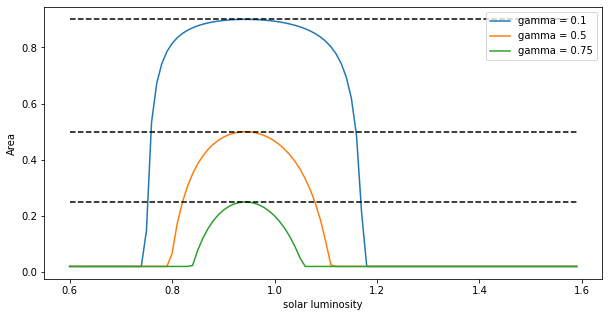

In [26]:
msg = '''
what controls the maximum attainable area of daisies?

This is controlled by gamma: the max total area of daisies 
is 1 - gamma. 
'''
print(msg)
planet_albedo = 0.5
albedo = np.array([1,1,1.]) * planet_albedo 

L = np.arange(0.6,1.6,0.01)
q = 20
S = 917

plt.figure(figsize=(10,5))

for gamma in [0.1,0.5,0.75]:
    area,Te,T1 = daisy_world(L,albedo,gamma=gamma,S=S,q=q,approx=False,min_area=0.01)
    # area plot
    plt.plot(L,area[0]+area[1],label=f'gamma = {gamma}')
    plt.plot(L,L*0+(1-gamma),'k--')
    
plt.xlabel('solar luminosity')
plt.ylabel('Area')
plt.legend(loc='best')

#### Exercise

* What is the impact of changing `q'` in the model? To address this, you should make sure to look in particular at the case `q'=0`


What is the impact of changing q' in the model? 
To address this, you should make sure to look in particular at the case q'=0

If q' == 0 (no resistance, so full mixing)
then the local and global temperatures are the same. 
The response is only to the average albedo of the planet.
The growth rate of both types of daisy is the same
when q' == 0, so only the contrast between the mean
albedo of the daisies and bare ground impacts
the model. In the case here, the mean daisy albedo
is the same as the bare ground albedo, so the 
overall effect is no impact on the planetary albedo
so no impact on temperature.

If we change the average daisy albedo to be different from
the planetary albedo, then it will impact temperature
through the feedback mechanism.

So, for q == 0, the daisies grow the same, their temperature 
is the same, and only the average albedo, compared to the
bare soil albedo matters. For higher q there is more contrast
in local temperatures and more contrast in daisy growth. In 

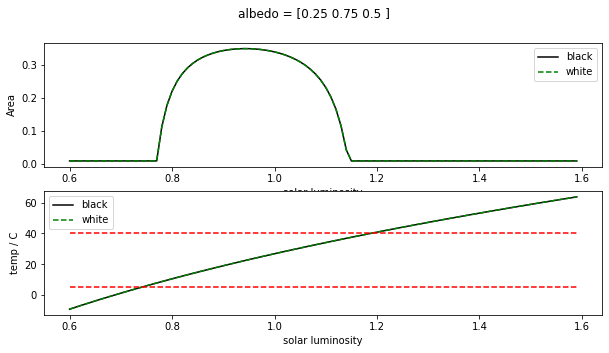

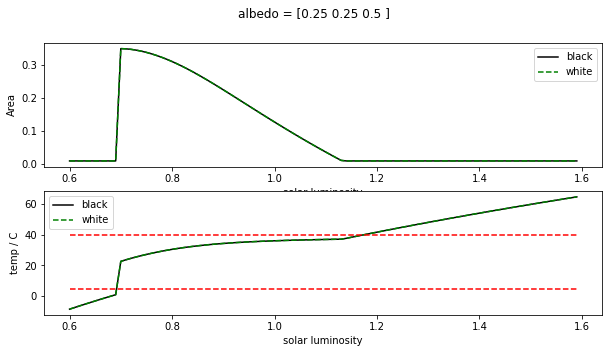

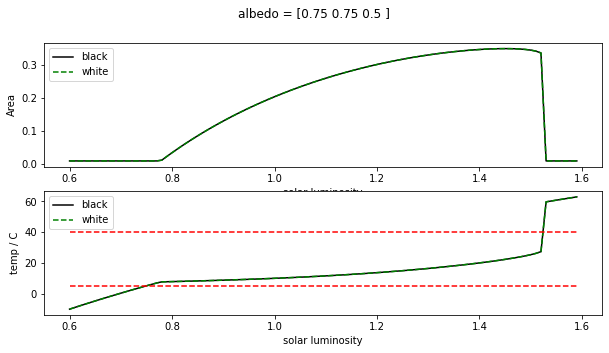

In [27]:
msg = '''
What is the impact of changing q' in the model? 
To address this, you should make sure to look in particular at the case q'=0
'''
print(msg)

albedo = np.array([0.25,0.75,0.5])

L = np.arange(0.6,1.6,0.01)
q = 0
S = 917
gamma = 0.3

area,Te,T1 = daisy_world(L,albedo,gamma=gamma,S=S,q=q,approx=False)

figs,axs = plt.subplots(2,1,figsize=(10,5))
figs.suptitle(f'albedo = {albedo}')
# area plot
axs[0].plot(L,area[0],'k',label='black')
axs[0].plot(L,area[1],'g--',label='white')
axs[0].set_xlabel('solar luminosity')
axs[0].set_ylabel('Area')
axs[0].legend(loc='best')

# temp
axs[1].plot(L,T1[0],'k',label='black')
axs[1].plot(L,T1[1],'g--',label='white')
axs[1].set_xlabel('solar luminosity')
axs[1].set_ylabel('temp / C')
axs[1].legend(loc='best')
axs[1].plot(L,L*0+5,'r--')
axs[1].plot(L,L*0+40,'r--')

msg = '''If q\' == 0 (no resistance, so full mixing)
then the local and global temperatures are the same. 
The response is only to the average albedo of the planet.
The growth rate of both types of daisy is the same
when q\' == 0, so only the contrast between the mean
albedo of the daisies and bare ground impacts
the model. In the case here, the mean daisy albedo
is the same as the bare ground albedo, so the 
overall effect is no impact on the planetary albedo
so no impact on temperature.

If we change the average daisy albedo to be different from
the planetary albedo, then it will impact temperature
through the feedback mechanism.

So, for q == 0, the daisies grow the same, their temperature 
is the same, and only the average albedo, compared to the
bare soil albedo matters. For higher q there is more contrast
in local temperatures and more contrast in daisy growth. In that 
case, as we have seen, the brighter daisies can withstand higher
luminosity than the darker daisies: the white daisies have a lower 
local temperature (cooling effect) and the black daisies a higher
local temperature (warming effect).
'''
print(msg)

# albedo 
albedo = np.array([0.25,0.25,0.5])

L = np.arange(0.6,1.6,0.01)
q = 0
S = 917
gamma = 0.3

area,Te,T1 = daisy_world(L,albedo,gamma=gamma,S=S,q=q,approx=False)

figs,axs = plt.subplots(2,1,figsize=(10,5))
figs.suptitle(f'albedo = {albedo}')
# area plot
axs[0].plot(L,area[0],'k',label='black')
axs[0].plot(L,area[1],'g--',label='white')
axs[0].set_xlabel('solar luminosity')
axs[0].set_ylabel('Area')
axs[0].legend(loc='best')

# temp
axs[1].plot(L,T1[0],'k',label='black')
axs[1].plot(L,T1[1],'g--',label='white')
axs[1].set_xlabel('solar luminosity')
axs[1].set_ylabel('temp / C')
axs[1].legend(loc='best')
axs[1].plot(L,L*0+5,'r--')
axs[1].plot(L,L*0+40,'r--')

# albedo 
albedo = np.array([0.75,0.75,0.5])

L = np.arange(0.6,1.6,0.01)
q = 0
S = 917
gamma = 0.3

area,Te,T1 = daisy_world(L,albedo,gamma=gamma,S=S,q=q,approx=False)

figs,axs = plt.subplots(2,1,figsize=(10,5))
figs.suptitle(f'albedo = {albedo}')
# area plot
axs[0].plot(L,area[0],'k',label='black')
axs[0].plot(L,area[1],'g--',label='white')
axs[0].set_xlabel('solar luminosity')
axs[0].set_ylabel('Area')
axs[0].legend(loc='best')

# temp
axs[1].plot(L,T1[0],'k',label='black')
axs[1].plot(L,T1[1],'g--',label='white')
axs[1].set_xlabel('solar luminosity')
axs[1].set_ylabel('temp / C')
axs[1].legend(loc='best')
axs[1].plot(L,L*0+5,'r--')
axs[1].plot(L,L*0+40,'r--')


The purpose of the model is not to pretend to be a surrogate of the Earth system, but rather to demonstrate the idea that biota can be involved in feedback mechanisms that maintain planetary physical quantities such as temperature to be suitable for the biota to survive over a wider range of conditions than would otherwise be the case. In this sense, the 'planet' has a regulating mechanism that allows it to maintain 'life' under the wider range of conditions. This arises from a diversity of albedo values across the populations: the presence of daisies can modulate the average albedo and therefore affect the temperature. This of course is a mechanism that also exists in the Earth system on a range of scales.

In Daisy World, we see that the mechanism can maintain the temperature at values suitable for daisy growth (the red dashed lines in the graphs above: 5 to 40 C - the red lines on the lower plot) over more than a factor of 2 increase in solar radiation, but only around 1.5 without the feedback (for these moderate values of albedo).

We have seen that the impact of the feedback mechanism has a dependence on the resistance value `q`: if there is no heat transport between categories of daisies (`q=0`) then the regulation mechanism is **only** dependent on the contrast between average daisy albedo and bare ground albedo and both populations grow at the same rate. If the resistance is high, then there is more diversity in local temperature and the populations of daisies grow at different rates.



## Summary

You should not be taking any results from running Daisy World and apply them too literally to considerations of the Earth System, but it should serve to reinforce your understanding of relationships between temperature and albedo and also demonstrate to you how feeedback mechanisms can operate. You can apply this learning to thought exercises that we have been through in class about terrestrial feedback mechanisms. The model should also serve to start you thinking about the idea of temperature regimes affecting plant growth that we will deal with more in later sessions.